# changing the event-selection cut that is based on \dEdx\ from \PIDa\ to \ChiSqrP
We suggest to replace the \dEdx-based cut from the slope of the \dEdx\ curve (\PIDa),
			to the $\chi^{2}$ of the fit to the expected proton \dEdx\ curve in LAr,
			on account that the latter yields better agreement with beam data.

In [1]:
import sys;
sys.path.insert(0, '../');sys.path.insert(0, '../../');
sys.path.insert(0,'../analysis_notes/mupClassification/'); sys.path.insert(0,'../analysis_notes/on_off_beam/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8_v9',
    'date': '2018_04_28'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.480008207788 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_dEdx_Cut/Figures/'

In [3]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_04_'+versions['date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OnBeam']+'_05_'+versions['date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print_and_say("%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume')

OffBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_04_'+versions['date']+'_vertices.csv')
                     ,pd.read_csv(vertices_files_path+'/'+versions['date']+'/'+versions['OffBeam']+'_05_'+versions['date']+'_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print_and_say("%d"%len(OffBeam)+' pairs from Off-Beam, %d'%len(OffBeamFV)+' in Fiducial Volume')

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['date'],filename=versions['Overlay']+'_'+versions['date']+'_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

38199 pairs from On-Beam, 24345 in Fiducial Volume
34730 pairs from Off-Beam, 21107 in Fiducial Volume
28935 pairs from MC-BNB + cosmic DATA overlay
19125 pairs in FV
5069 are 1mu-1p, 26.5%
4364 are other pairs, 22.8%
9692 are cosmic, 50.7%
--------------------------------------------------------------
2404 are CC 1p 0pi, 12.6%
9692 cosmic pairs and 5069 mu-p pairs in overlay


In [4]:
# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order  = ['no cut','PIDa','ClosestFlash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.5%,100.0%,12.6%,no cut,100.0% (5069),100.0% (4364),100.0% (9692),100.0% (2404)
PIDa,65.4%,54.1%,68.1%,26.7%,PIDa,65.4% (3316),34.6% (1511),13.4% (1301),68.1% (1637)
ClosestFlash,61.3%,59.7%,63.6%,29.4%,ClosestFlash,61.3% (3106),33.8% (1474),6.5% (626),63.6% (1530)
length,54.7%,68.0%,57.8%,34.1%,length,54.7% (2771),20.1% (875),4.4% (429),57.8% (1389)
vertex activity,37.5%,70.3%,50.2%,44.6%,vertex activity,37.5% (1902),12.9% (565),2.4% (237),50.2% (1206)
delta phi,24.4%,81.4%,38.1%,60.4%,delta phi,24.4% (1236),3.1% (136),1.5% (146),38.1% (917)
soft Pt,20.9%,88.3%,34.4%,68.8%,soft Pt,20.9% (1061),2.0% (87),0.6% (54),34.4% (827)


# overlay subsamples-scaling

In [5]:
f_OverlayCosmic=1.45 # by which factor should we increase the cosmic part in the overlay
overlay_scalings = dict()
overlay_scalings['only POT'] = get_samples_scaling( N_total='MC(tot) x POT' 
                                                   , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['POT & f(Overlay-Cosmic)=%.2f'%f_OverlayCosmic] = get_samples_scaling( N_total='MC(tot) x POT' 
                                                                                       , f_OverlayCosmic=f_OverlayCosmic  # by which factor should we increase the cosmic part in the overlay                                                                         
                                                                                       , OverlaySubsamples=reducedOverlay['no cut'])
f_Cosmic = 0.88
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])

print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling and f(cosmic)=0.88': {   '1mu-1p': 0.3096999893989187,
                                            'CC 1p 0pi': 0.30969998939891874,
                                            'cosmic': 2.2104416013206767,
                                            'other pairs': 0.3096999893989187},
    'POT & f(Overlay-Cosmic)=1.45': {   '1mu-1p': 0.48000820778826886,
                                        'CC 1p 0pi': 0.48000820778826886,
                                        'cosmic': 0.7151816993464052,
                                        'other pairs': 0.4800082077882688},
    'only POT': {   '1mu-1p': 0.48000820778826886,
                    'CC 1p 0pi': 0.48000820778826886,
                    'cosmic': 0.4800082077882688,
                    'other pairs': 0.4800082077882688}}


## PIDa

In [6]:
cuts_order  = ['no cut','ClosestFlash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_dEdx_Cut/Figures/pidcali_PIDaYplane_pCandidate.pdf


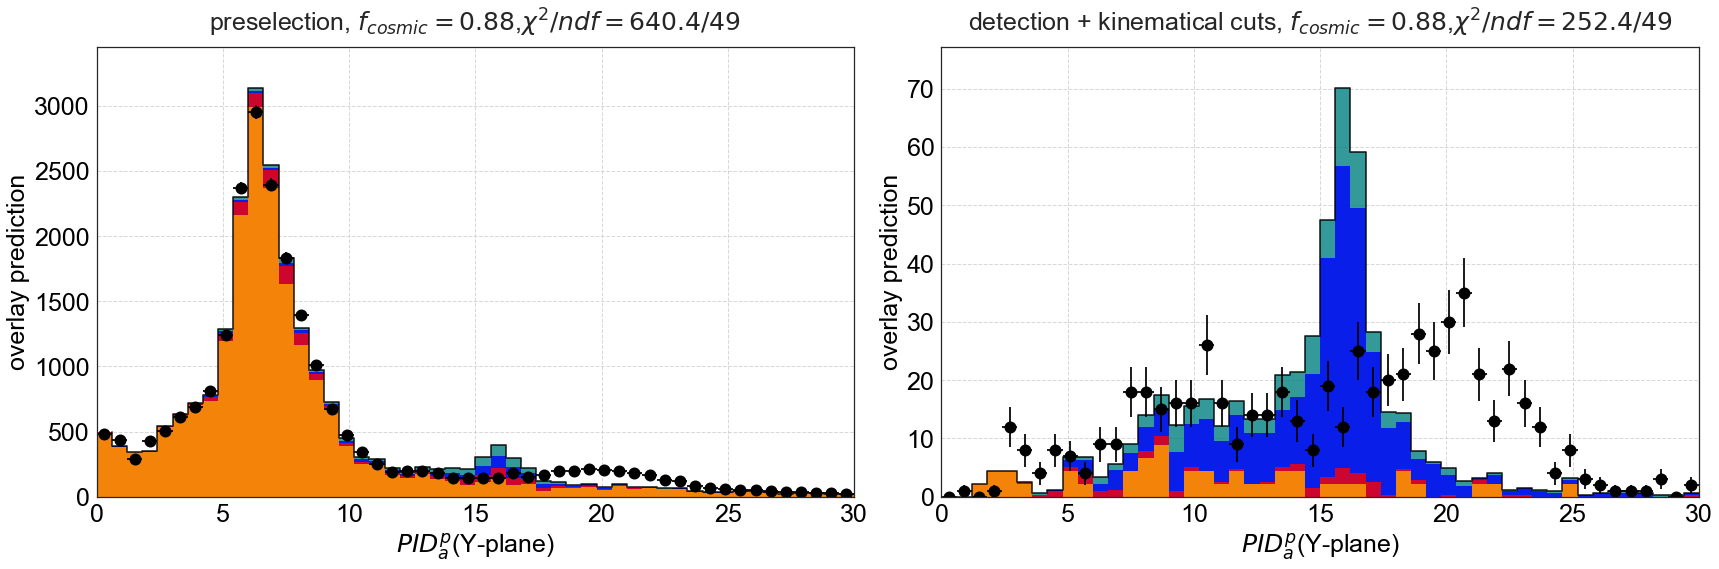

In [7]:
plot_nocut_finalcut(var='pidcali_PIDaYplane_pCandidate'                          
                          ,x_label= r'$PID_{a}^{p}$(Y-plane)',bins=linspace(0,30,51)                          
                          ,overlay_scalings=overlay_scalings
                          ,scaling_name='N(On) scaling and f(cosmic)=%.2f'%f_Cosmic
                          ,f_Cosmic=f_Cosmic
                          ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay                          
                          ,xlim=(0,30),chi2_xrange=(0,30));
filename = figures_path + 'pidcali_PIDaYplane_pCandidate.pdf'
plt.savefig(filename)
print_and_say("saved "+filename)

# $\chi^2_{\mu}$, $\chi^2_{p}$

In [8]:
cuts_order  = ['no cut','ClosestFlash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


# 2d $\chi^2_{p}$ of the proton vs. the muon candidate

In [9]:
Chi2Proton_muCandidate_min=80
Chi2Proton_muCandidate_max=10000
Chi2Proton_pCandidate_min=0
Chi2Proton_pCandidate_max=60

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_dEdx_Cut/Figures/pidcali_Chi2ProtonYplane_muCandidate.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/Change_dEdx_Cut/Figures/pidcali_Chi2ProtonYplane_pCandidate.pdf


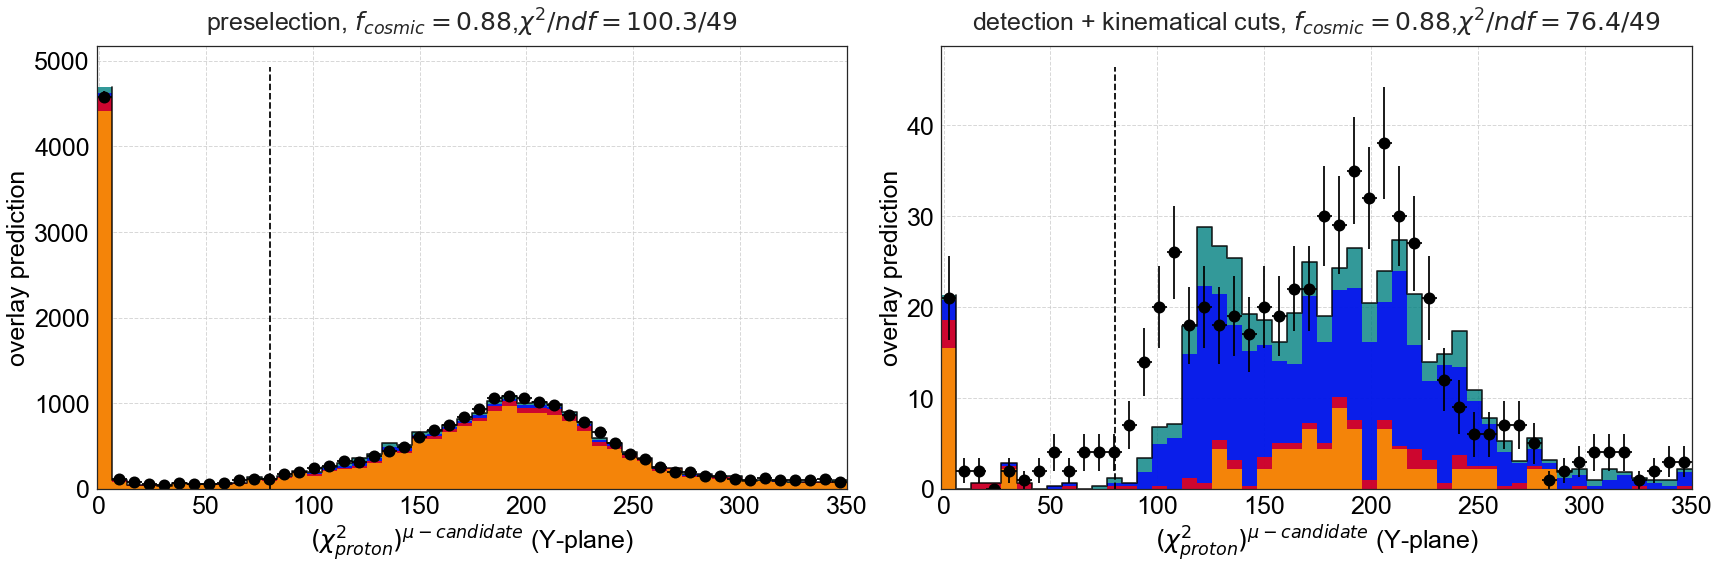

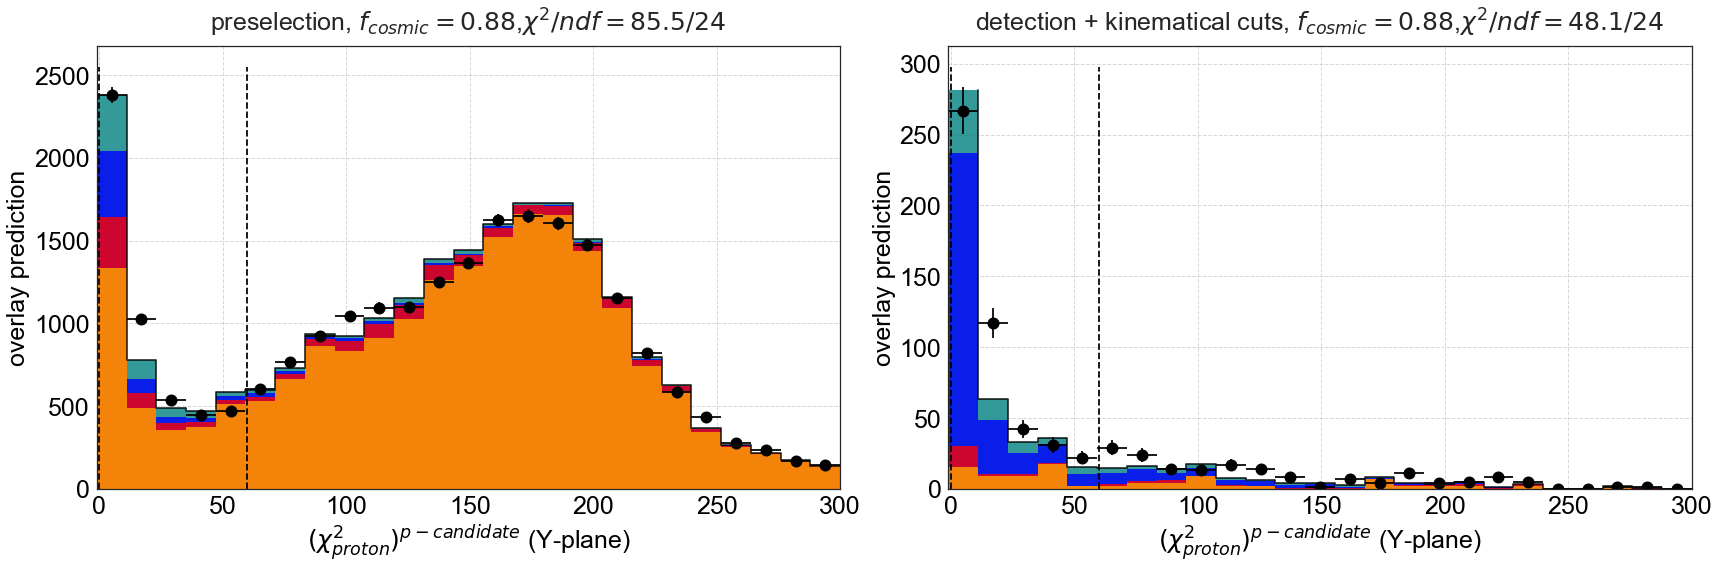

In [10]:
plot_nocut_finalcut(var='pidcali_Chi2ProtonYplane_muCandidate'
                                       ,x_label= r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)',bins=linspace(-1,350,51)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='N(On) scaling and f(cosmic)=%.2f'%f_Cosmic
                          ,f_Cosmic=f_Cosmic
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(-1,350),x_varcut=(Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_max)
                                       ,chi2_xrange=(0,300));
filename = figures_path + 'pidcali_Chi2ProtonYplane_muCandidate.pdf'
plt.savefig(filename)
print_and_say("saved "+filename)

plot_nocut_finalcut(var='pidcali_Chi2ProtonYplane_pCandidate'
                                       ,x_label= r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
                          ,bins=linspace(-1,300,26)
                                       ,overlay_scalings=overlay_scalings
                          ,scaling_name='N(On) scaling and f(cosmic)=%.2f'%f_Cosmic
                          ,f_Cosmic=f_Cosmic
                                       ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                                       ,xlim=(-1,300),x_varcut=(Chi2Proton_pCandidate_min,Chi2Proton_pCandidate_max)
                                       ,chi2_xrange=(0,150));
filename = figures_path + 'pidcali_Chi2ProtonYplane_pCandidate.pdf'
plt.savefig(filename)
print_and_say("saved "+filename)


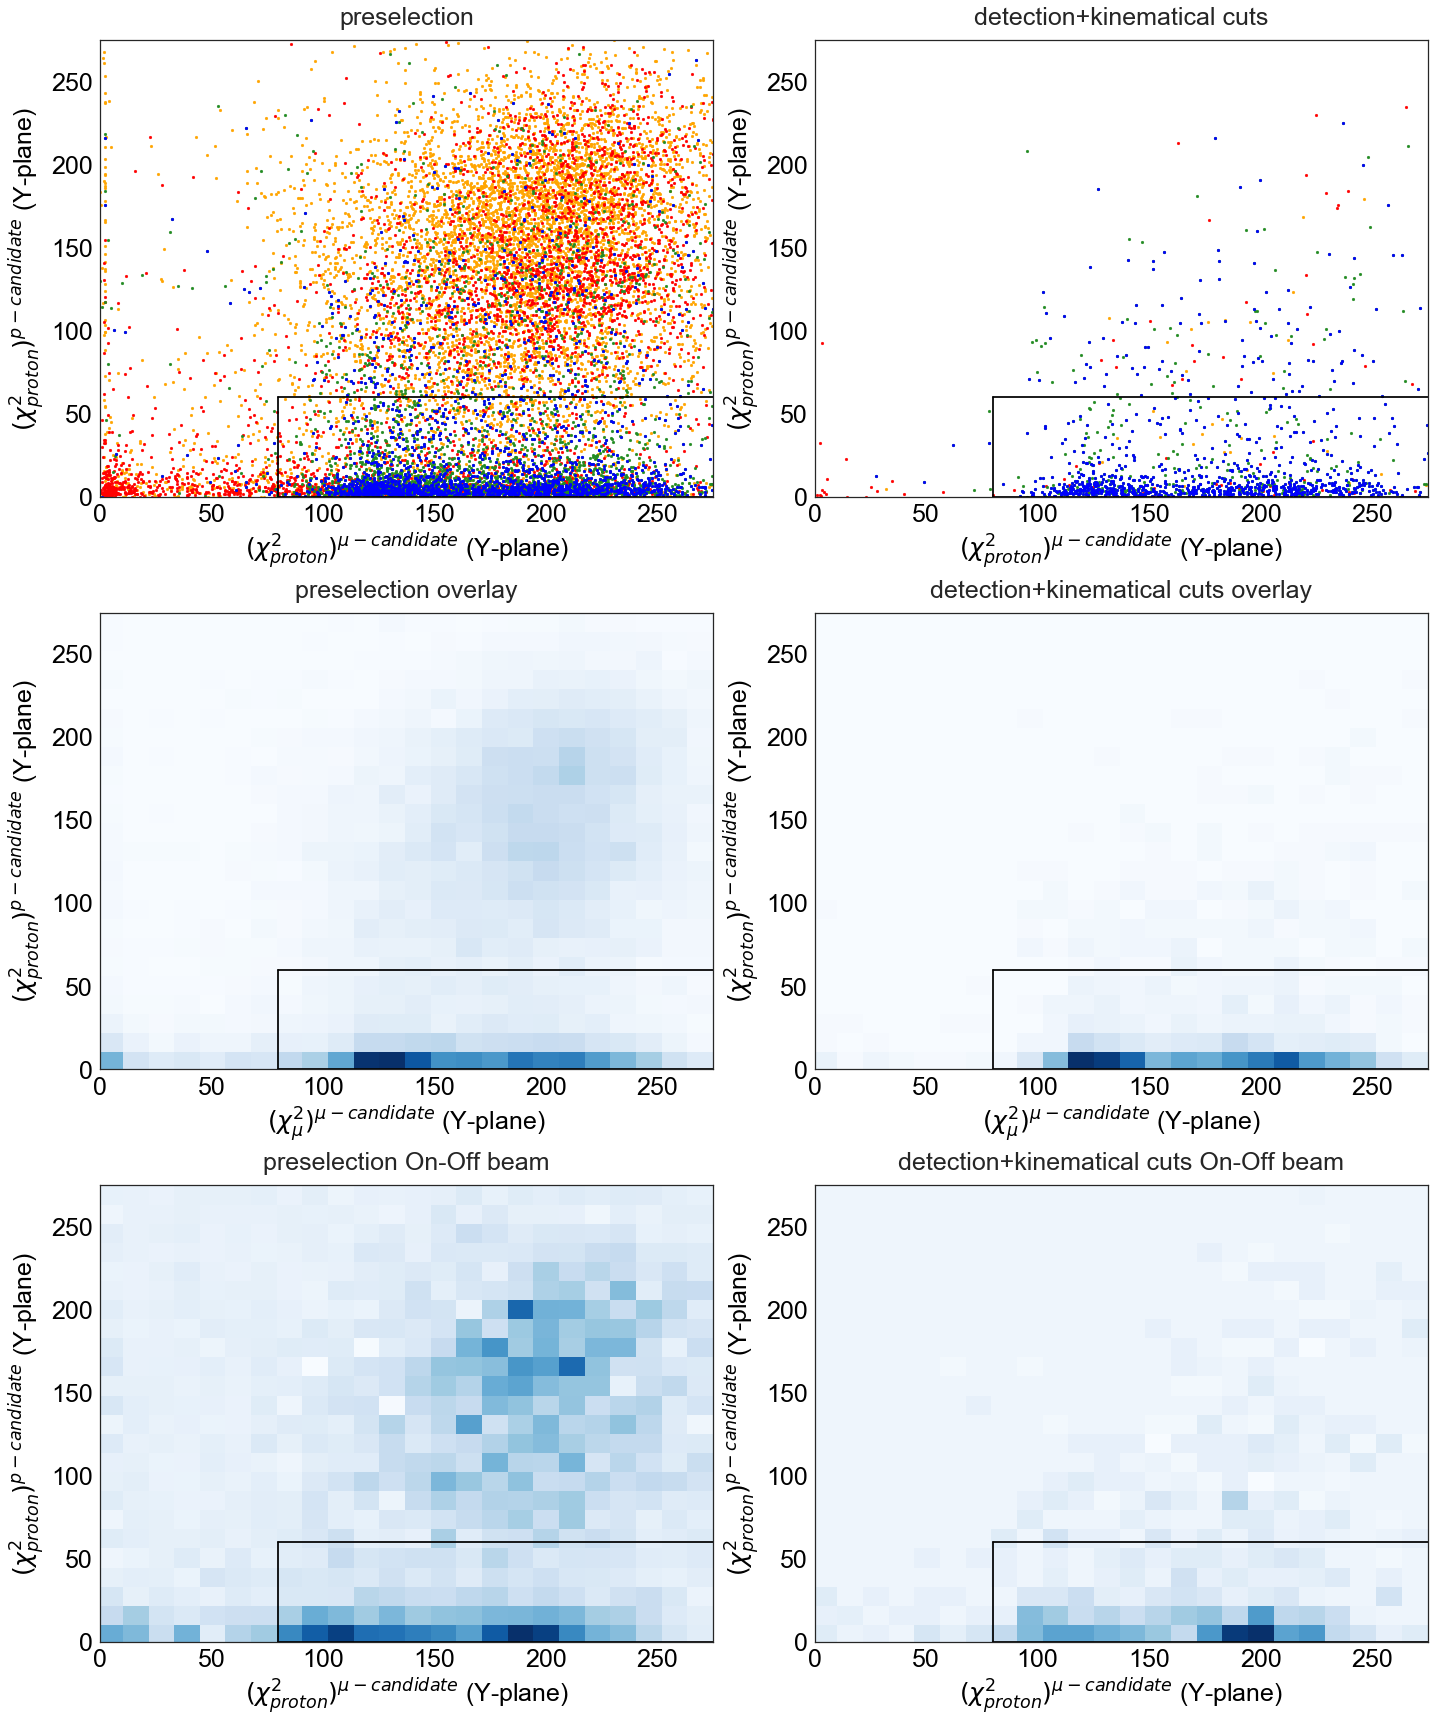

In [11]:
bins = (linspace(-1,275,25),linspace(-1,275,25))
varx,vary =  'pidcali_Chi2ProtonYplane_muCandidate','pidcali_Chi2ProtonYplane_pCandidate'
xcut = (Chi2Proton_muCandidate_min,Chi2Proton_muCandidate_max)
ycut = (Chi2Proton_pCandidate_min,Chi2Proton_pCandidate_max)

fig=plt.figure(figsize=(20,24))
for icut,(cut_name,cut_label) in enumerate(zip(['no cut','soft Pt']
                                               ,['preselection','detection+kinematical cuts'])):
    ax = fig.add_subplot(3,2,icut+1)

    overlay = reducedOverlay[cut_name]
    for sample,color in zip([overlay['cosmic'],overlay['other pairs'],overlay['1mu-1p'],overlay['CC 1p 0pi']]
                            ,['orange','red','forestgreen','blue']):
        sample = sample[(sample[varx]!=0)&(sample[vary]!=0)]
        plt.scatter(sample[varx],sample[vary],color=color,s=8)
    set_axes(ax,x_label=r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins)),ylim=(0,np.max(bins))
             ,title=cut_label)
    plt.plot([xcut[0],xcut[0]],ycut,'-',[xcut[1],xcut[1]],ycut,'-'
             ,xcut,[ycut[0],ycut[0]],'-',xcut,[ycut[1],ycut[1]],'-',color='black')
    
    ax = fig.add_subplot(3,2,icut+3)
    overlay_all = pd.concat([overlay['cosmic'],overlay['other pairs'],overlay['1mu-1p']])
    overlay_all = overlay_all[(overlay_all[varx]!=0)&(overlay_all[vary]!=0)]
    h_T,xedges, yedges = np.histogram2d( overlay_all[varx] , overlay_all[vary] , bins=bins )    
    X, Y = np.meshgrid(xedges, yedges)
    elev_min, elev_max = np.min(h_T) , np.max(h_T)
    pcmesh = ax.pcolormesh(X, Y, h_T.T ,cmap='Blues')
    set_axes(ax,x_label=r'$(\chi^2_{\mu})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins[0])),ylim=(0,np.max(bins[1]))
             ,title=cut_label+' overlay')    
    plt.plot([xcut[0],xcut[0]],ycut,'-',[xcut[1],xcut[1]],ycut,'-'
             ,xcut,[ycut[0],ycut[0]],'-',xcut,[ycut[1],ycut[1]],'-',color='black')


    
    ax = fig.add_subplot(3,2,icut+5)
    OnBeamSample = reducedOnBeam[cut_name] 
    OnBeamSample = OnBeamSample[(OnBeamSample[varx]!=0)&(OnBeamSample[vary]!=0)]
    OffBeamSample = reducedOffBeam[cut_name] 
    OffBeamSample = OffBeamSample[(OffBeamSample[varx]!=0)&(OffBeamSample[vary]!=0)]

    h_OnBeam_T,xedges, yedges = np.histogram2d( OnBeamSample[varx] , OnBeamSample[vary] , bins=bins )
    h_OffBeam_T,xedges, yedges = np.histogram2d( OffBeamSample[varx] , OffBeamSample[vary] , bins=bins )
    
    h_OnBeam_minus_OffBeam_T = h_OnBeam_T - OffBeam_scaling*h_OffBeam_T
    h_OnBeam_minus_OffBeam = h_OnBeam_minus_OffBeam_T.T
    
    X, Y = np.meshgrid(xedges, yedges)
    elev_min, elev_max = np.min(h_OnBeam_minus_OffBeam) , np.max(h_OnBeam_minus_OffBeam)
    pcmesh = ax.pcolormesh(X, Y, h_OnBeam_minus_OffBeam ,cmap='Blues'
                          )
    set_axes(ax,x_label=r'$(\chi^2_{proton})^{\mu-candidate}$ (Y-plane)'
             ,y_label=r'$(\chi^2_{proton})^{p-candidate}$ (Y-plane)'
             ,xlim=(0,np.max(bins)),ylim=(0,np.max(bins))
             ,title=cut_label+' On-Off beam')
    plt.plot([xcut[0],xcut[0]],ycut,'-',[xcut[1],xcut[1]],ycut,'-'
             ,xcut,[ycut[0],ycut[0]],'-',xcut,[ycut[1],ycut[1]],'-',color='black')

    
plt.tight_layout()

# what happens if we apply a cut on $\chi^2_{proton}$?

In [12]:
versions['date'] = "2018_05_07"
versions['Overlay'] = "prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2"
OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['date'],filename=versions['Overlay']+'_'+versions['date']+'_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

101046 pairs from MC-BNB + cosmic DATA overlay
66744 pairs in FV
18025 are 1mu-1p, 27.0%
15339 are other pairs, 23.0%
33380 are cosmic, 50.0%
--------------------------------------------------------------
8617 are CC 1p 0pi, 12.9%
33380 cosmic pairs and 18025 mu-p pairs in overlay


In [13]:
cuts_order  = ['no cut','ClosestFlash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','ClosestFlash',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,pureffOverlayNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
pureffOverlay

done applying cuts to overlay
done applying cuts to data


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.0%,100.0%,12.9%,no cut,100.0% (18025),100.0% (15339),100.0% (33380),100.0% (8617)
ClosestFlash,94.2%,36.8%,94.0%,17.5%,ClosestFlash,94.2% (16985),94.9% (14554),43.8% (14629),94.0% (8099)
length,74.0%,53.1%,77.9%,26.7%,length,74.0% (13340),44.1% (6759),15.1% (5043),77.9% (6714)
non-collinearity,67.1%,67.6%,73.3%,35.3%,non-collinearity,67.1% (12087),27.7% (4249),4.6% (1541),73.3% (6318)
vertex activity,45.7%,70.3%,63.4%,46.6%,vertex activity,45.7% (8241),17.2% (2641),2.5% (841),63.4% (5459)
delta phi,30.5%,87.1%,48.2%,65.9%,delta phi,30.5% (5496),3.9% (596),0.7% (217),48.2% (4155)
soft Pt,26.9%,91.3%,43.5%,70.6%,soft Pt,26.9% (4845),2.2% (331),0.4% (132),43.5% (3748)


In [14]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (33380) & 100.0% (8617) & 12.9%\tabularnewline
\hline
ClosestFlash & 43.8% (14629) & 94.0% (8099) & 17.5%\tabularnewline
\hline
length & 15.1% (5043) & 77.9% (6714) & 26.7%\tabularnewline
\hline
non-collinearity & 4.6% (1541) & 73.3% (6318) & 35.3%\tabularnewline
\hline
vertex activity & 2.5% (841) & 63.4% (5459) & 46.6%\tabularnewline
\hline
delta phi & 0.7% (217) & 48.2% (4155) & 65.9%\tabularnewline
\hline
soft Pt & 0.4% (132) & 43.5% (3748) & 70.6%\tabularnewline
\hline


In [15]:
cuts_order  = ['no cut','PIDa','ClosestFlash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection',r'$PID_{a}^{proton-candidate}$','ClosestFlash',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
pureffOverlay

done applying cuts to overlay
done applying cuts to data


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.0%,100.0%,12.9%,no cut,100.0% (18025),100.0% (15339),100.0% (33380),100.0% (8617)
PIDa,66.3%,55.7%,69.8%,28.1%,PIDa,66.3% (11950),33.8% (5191),12.9% (4294),69.8% (6013)
ClosestFlash,62.7%,62.0%,65.8%,31.1%,ClosestFlash,62.7% (11306),32.7% (5018),5.7% (1904),65.8% (5668)
length,56.4%,70.2%,60.5%,36.0%,length,56.4% (10163),19.7% (3018),3.9% (1292),60.5% (5210)
non-collinearity,51.0%,77.0%,56.9%,41.0%,non-collinearity,51.0% (9195),14.2% (2180),1.7% (566),56.9% (4901)
vertex activity,35.4%,79.9%,49.9%,53.9%,vertex activity,35.4% (6373),8.7% (1333),0.8% (270),49.9% (4300)
delta phi,23.4%,91.9%,37.9%,71.2%,delta phi,23.4% (4211),1.9% (286),0.3% (87),37.9% (3262)
soft Pt,20.4%,93.6%,33.9%,74.3%,soft Pt,20.4% (3680),1.3% (196),0.2% (55),33.9% (2919)


In [16]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (33380) & 100.0% (8617) & 12.9%\tabularnewline
\hline
PIDa & 12.9% (4294) & 69.8% (6013) & 28.1%\tabularnewline
\hline
ClosestFlash & 5.7% (1904) & 65.8% (5668) & 31.1%\tabularnewline
\hline
length & 3.9% (1292) & 60.5% (5210) & 36.0%\tabularnewline
\hline
non-collinearity & 1.7% (566) & 56.9% (4901) & 41.0%\tabularnewline
\hline
vertex activity & 0.8% (270) & 49.9% (4300) & 53.9%\tabularnewline
\hline
delta phi & 0.3% (87) & 37.9% (3262) & 71.2%\tabularnewline
\hline
soft Pt & 0.2% (55) & 33.9% (2919) & 74.3%\tabularnewline
\hline


In [17]:
cuts_order  = ['no cut','Chi2Proton','ClosestFlash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection',r'$\chi^{2}_{proton-assumption}$','ClosestFlash',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order
                                                       ,Chi2Proton_muCandidate_min=100,Chi2Proton_muCandidate_max=np.inf
                                                       ,Chi2Proton_pCandidate_min=0,Chi2Proton_pCandidate_max=60)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
pureffOverlay

done applying cuts to overlay
done applying cuts to data


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.0%,100.0%,12.9%,no cut,100.0% (18025),100.0% (15339),100.0% (33380),100.0% (8617)
Chi2Proton,70.7%,68.0%,75.4%,34.6%,Chi2Proton,70.7% (12743),20.6% (3153),8.5% (2852),75.4% (6493)
ClosestFlash,66.9%,73.5%,71.1%,37.3%,ClosestFlash,66.9% (12055),19.8% (3035),3.9% (1312),71.1% (6124)
length,60.7%,79.3%,65.8%,41.1%,length,60.7% (10946),12.0% (1842),3.0% (1014),65.8% (5669)
non-collinearity,55.2%,84.7%,62.0%,45.5%,non-collinearity,55.2% (9941),8.9% (1368),1.3% (433),62.0% (5346)
vertex activity,38.1%,86.5%,54.1%,58.7%,vertex activity,38.1% (6861),5.5% (850),0.7% (221),54.1% (4658)
delta phi,25.5%,94.2%,41.2%,72.7%,delta phi,25.5% (4598),1.3% (196),0.3% (87),41.2% (3550)
soft Pt,22.5%,95.6%,37.0%,75.4%,soft Pt,22.5% (4048),0.9% (132),0.2% (55),37.0% (3192)


In [18]:
table = pureffOverlay[[ u'cosmic',u'CC 1p 0pi',u'CC$0\pi 1 p$ pur.']]
print 
print "\hline \hline"
for i,row in table.iterrows(): 
    print "%s"%i + " & " + row[u'cosmic'] + " & " + row[u'CC 1p 0pi'] + " & "  +row[u'CC$0\pi 1 p$ pur.']+ "\\tabularnewline"
    print "\hline"


\hline \hline
no cut & 100.0% (33380) & 100.0% (8617) & 12.9%\tabularnewline
\hline
Chi2Proton & 8.5% (2852) & 75.4% (6493) & 34.6%\tabularnewline
\hline
ClosestFlash & 3.9% (1312) & 71.1% (6124) & 37.3%\tabularnewline
\hline
length & 3.0% (1014) & 65.8% (5669) & 41.1%\tabularnewline
\hline
non-collinearity & 1.3% (433) & 62.0% (5346) & 45.5%\tabularnewline
\hline
vertex activity & 0.7% (221) & 54.1% (4658) & 58.7%\tabularnewline
\hline
delta phi & 0.3% (87) & 41.2% (3550) & 72.7%\tabularnewline
\hline
soft Pt & 0.2% (55) & 37.0% (3192) & 75.4%\tabularnewline
\hline
